# KNN Lung Cancer Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/user/Downloads/lung_cancer_examples.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [4]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [5]:
df.describe(include = "all")

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
count,59,59,59.000000,59.000000,59.000000,59.000000,59.000000
unique,49,49,NaN,NaN,NaN,NaN,NaN
top,Katharine,Hepburn,NaN,NaN,NaN,NaN,NaN
freq,4,4,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,42.627119,15.067797,5.203390,3.237288,0.474576
std,NaN,NaN,16.235230,7.984607,2.461984,2.380517,0.503640
min,NaN,NaN,18.000000,0.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,29.000000,10.000000,3.000000,1.000000,0.000000
50%,NaN,NaN,39.000000,15.000000,5.000000,3.000000,0.000000
75%,NaN,NaN,55.000000,20.000000,7.500000,5.000000,1.000000


In [6]:
print(pd.isnull(df).sum())

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [8]:
from datetime import datetime
start = datetime.now()

In [9]:
data = df.drop(['Name','Surname'], axis = 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Result'],axis=1), 
                                                    data['Result'], test_size=0.20, 
                                                    random_state=10)

In [11]:
knnmodel = KNeighborsClassifier(n_neighbors=5)
knnmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [12]:
predictions = knnmodel.predict(X_test)
X_test.head()

,Age,Smokes,AreaQ,Alkhol
31,56,20,3,3
3,28,0,8,1
38,33,25,8,2
27,34,12,8,0
21,33,8,8,1


In [13]:
accuracy_knnmodel = knnmodel.score(X_test,y_test)
print(accuracy_knnmodel*100,'%')                               

83.33333333333334 %


In [14]:
end = datetime.now()

In [15]:
print("The time of execution of above program is :",
      str(end-start)[5:])

The time of execution of above program is : 00.224147


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.33      1.00      0.50         1

    accuracy                           0.83        12
   macro avg       0.67      0.91      0.70        12
weighted avg       0.94      0.83      0.87        12



In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[9, 2],
       [0, 1]], dtype=int64)

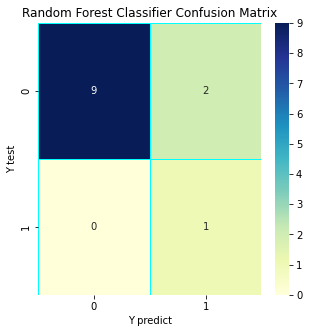

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
knnmodel_cm = confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knnmodel_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()